In [62]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Final Clean Dataset.csv") 
df

,Name,Type,Norad ID,Int'l Code,Perigee,Apogee,Period,Launch Date,Source,Month,Orbit
0,STARLINK-3314,0,50851,2022-001BA,315.2,329.2,90.8,"January 6, 2022",United States (US),1,1
1,STARLINK-3312,0,50850,2022-001AZ,315.9,328.5,90.8,"January 6, 2022",United States (US),1,1
2,STARLINK-3311,0,50849,2022-001AY,315.4,329.3,90.8,"January 6, 2022",United States (US),1,1
3,STARLINK-3315,0,50848,2022-001AX,315.2,329.3,90.8,"January 6, 2022",United States (US),1,1
4,STARLINK-3319,0,50847,2022-001AW,315.5,329.5,90.8,"January 6, 2022",United States (US),1,1
...,...,...,...,...,...,...,...,...,...,...,...
6306,NIMIQ 1,1,25740,1999-027A,36221.6,36328.1,1460.7,"May 20, 1999",Canada (CA),5,3
6307,MSAT M1,1,23846,1996-022A,36190.0,36322.7,1459.8,"April 20, 1996",Canada (CA),4,3
6308,ANIK E1,1,21726,1991-067A,36054.9,36150.6,1451.9,"September 26, 1991",Canada (CA),9,3
6309,ANIK E2,1,21222,1991-026A,36078.6,36157.1,1452.7,"April 4, 1991",Canada (CA),4,3


In [34]:
df_copy=df[["Type" , "Orbit"]].copy()
df_copy

,Type,Orbit
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6306,1,3
6307,1,3
6308,1,3
6309,1,3


array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 3],
       [1, 3],
       [1, 3]], dtype=int64)

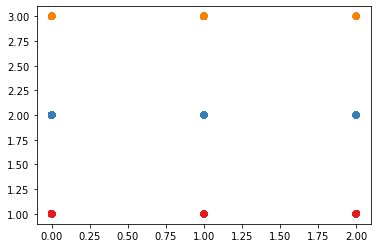

In [47]:
X_Kmeans=df[["Type" , "Orbit"]].copy()
X_val = X_Kmeans.values
plt.scatter(X_val[:, 0], X_val[:, 1], c = targ ,marker="o",cmap=cmap);
X_val

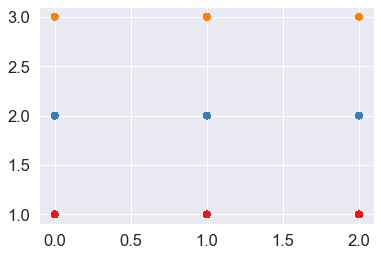

In [68]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 71)
y_kmeans = kmeans.fit_predict(X_val)
plt.scatter(X_val[:, 0], X_val[:, 1], c=targ,  marker="o", cmap=cmap);

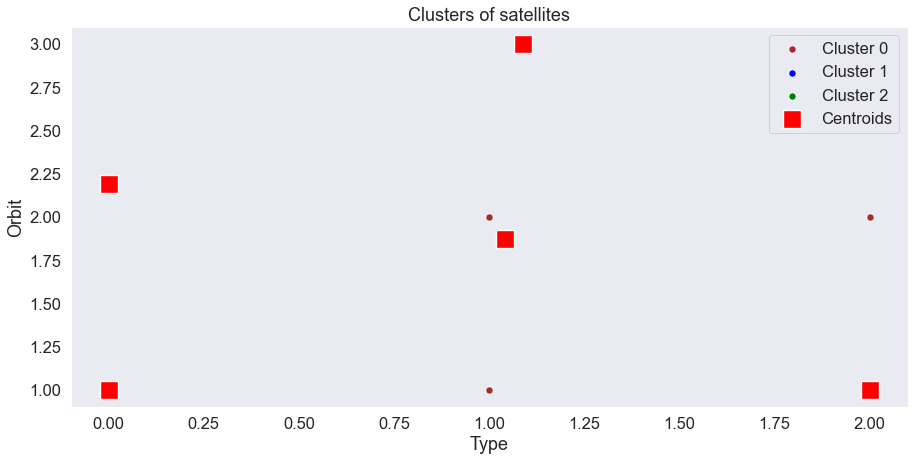

In [69]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X_val[y_kmeans == 0, 0], X_val[y_kmeans == 0, 1], color = 'brown', label = 'Cluster 0',s=50)
sns.scatterplot(X_val[y_kmeans == 1, 0], X_val[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 1',s=50)
sns.scatterplot(X_val[y_kmeans == 2, 0], X_val[y_kmeans == 2, 1], color = 'green', label = 'Cluster 2',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of satellites')
plt.xlabel('Type')
plt.ylabel('Orbit')
plt.legend()
plt.show()

In [70]:
# Unsupervised Learning - K-means

df_copy['Clusters'] = KMeans(n_clusters=5, init='k-means++', random_state = 71).fit_predict(X_Kmeans)
y = df_copy['Clusters']
df_copy['Clusters'] = df_copy['Clusters']


In [71]:
unique_arr = df_copy["Clusters"].unique()
unique_arr

tmp = df_copy[df_copy["Clusters"] == 0]
tmp.describe()

,Type,Orbit,Clusters
count,956.000000,956.000000,956.0
mean,1.040795,1.870293,0.0
std,0.197918,0.336157,0.0
min,1.000000,1.000000,0.0
25%,1.000000,2.000000,0.0
50%,1.000000,2.000000,0.0
75%,1.000000,2.000000,0.0
max,2.000000,2.000000,0.0


In [72]:
tmp = df_copy[df_copy["Clusters"] == 1]
tmp.describe()

,Type,Orbit,Clusters
count,3465.0,3465.0,3465.0
mean,0.0,1.0,1.0
std,0.0,0.0,0.0
min,0.0,1.0,1.0
25%,0.0,1.0,1.0
50%,0.0,1.0,1.0
75%,0.0,1.0,1.0
max,0.0,1.0,1.0


In [73]:
tmp = df_copy[df_copy["Clusters"] == 2]
tmp.describe()

,Type,Orbit,Clusters
count,1197.0,1197.0,1197.0
mean,2.0,1.0,2.0
std,0.0,0.0,0.0
min,2.0,1.0,2.0
25%,2.0,1.0,2.0
50%,2.0,1.0,2.0
75%,2.0,1.0,2.0
max,2.0,1.0,2.0
